Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



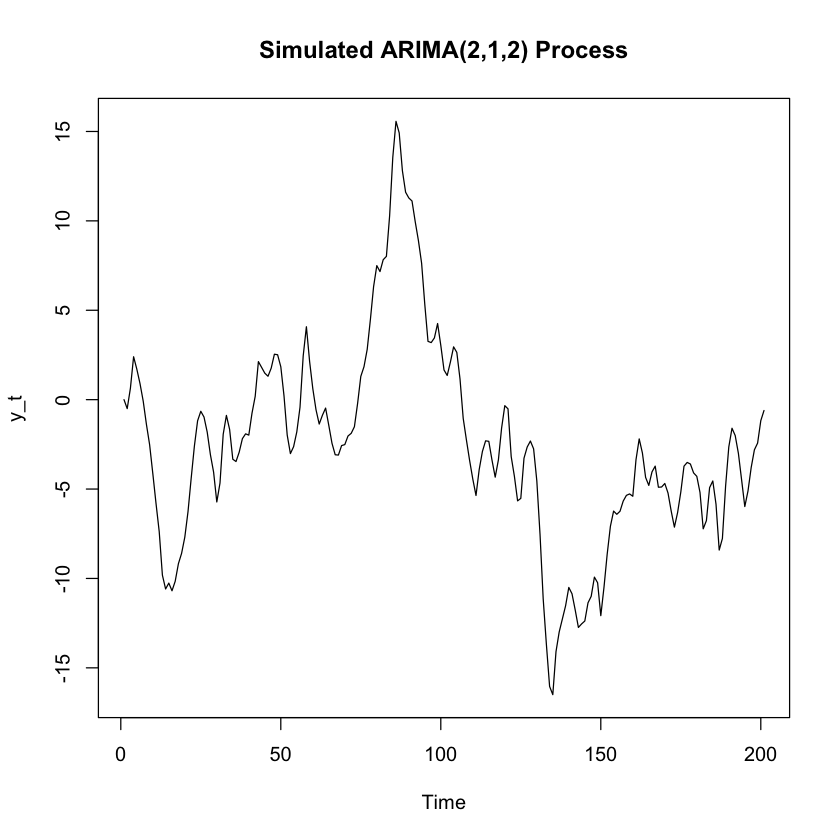

In [1]:
#### R Code
# Load necessary library
library(forecast)

# Set seed for reproducibility
set.seed(123)

# Simulate ARIMA(2,1,2) process
simulated_arima <- arima.sim(model = list(order = c(2, 1, 2), ar = c(0.5, -0.3), ma = c(0.4, 0.3)), n = 200)

# Plot the simulated time series
plot(simulated_arima, main = "Simulated ARIMA(2,1,2) Process", ylab = "y_t")


	Ljung-Box test

data:  Residuals from ARIMA(2,1,2)
Q* = 5.1968, df = 6, p-value = 0.5188

Model df: 4.   Total lags used: 10



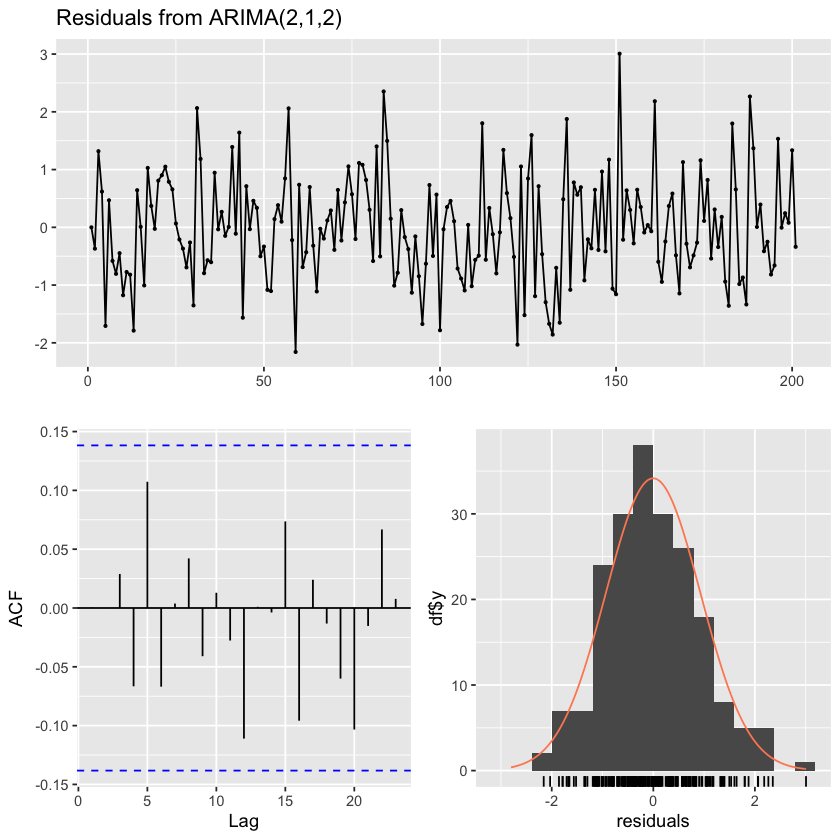

In [2]:
# Fit an ARIMA model (assuming we selected ARIMA(2,1,2) manually)
fit <- Arima(simulated_arima, order = c(2, 1, 2))

# Check residuals
checkresiduals(fit)

In [3]:
# Test for zero mean
mean(residuals(fit))

# Normality test using Shapiro-Wilk test
shapiro.test(residuals(fit))

# Ljung-Box test for autocorrelation in residuals
Box.test(residuals(fit), type = "Ljung-Box", lag = 10)

[1] -0.003394995


	Shapiro-Wilk normality test

data:  residuals(fit)
W = 0.99204, p-value = 0.3428



	Box-Ljung test

data:  residuals(fit)
X-squared = 5.1968, df = 10, p-value = 0.8777



The downloaded binary packages are in
	/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T//Rtmp3OjtJq/downloaded_packages

The downloaded binary packages are in
	/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T//Rtmp3OjtJq/downloaded_packages


Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR



[1] "GSPC"

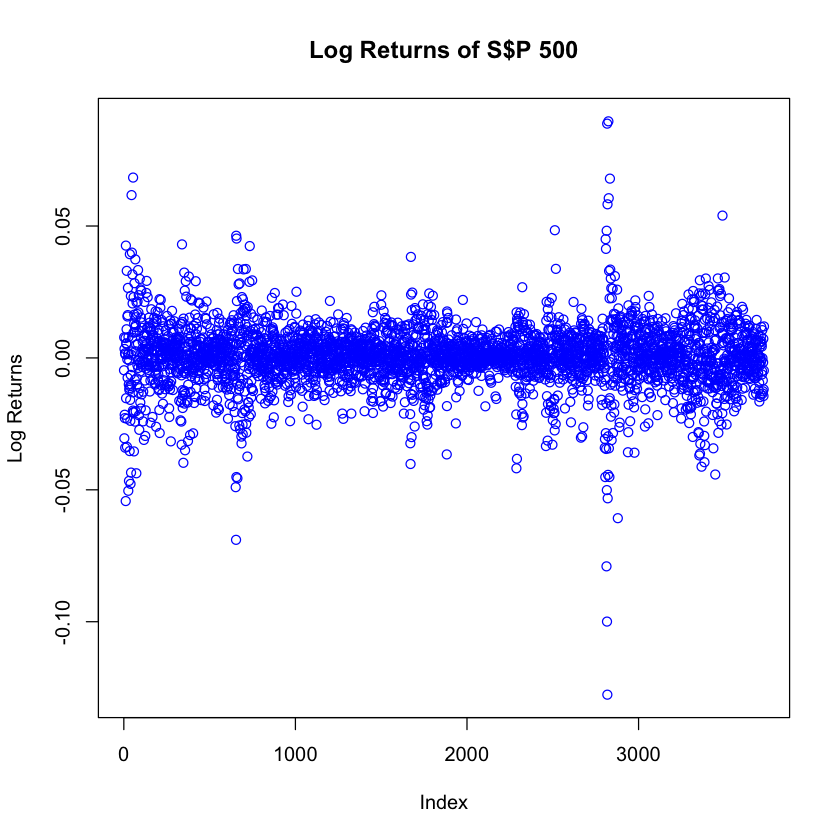

In [4]:
# Load necessary libraries
install.packages("quantmod")
install.packages("forecast")
library(quantmod)
library(forecast)

# Download S$P 500 data
getSymbols("^GSPC", from = "2009-01-01", to = "2023-10-31")
sp500_prices <- Ad(GSPC) # Use adjusted closing prices

# Calculate log returns
log_returns <- diff(log(coredata(sp500_prices)))
plot(log_returns, main = "Log Returns of S$P 500", ylab = "Log Returns", col = "blue")

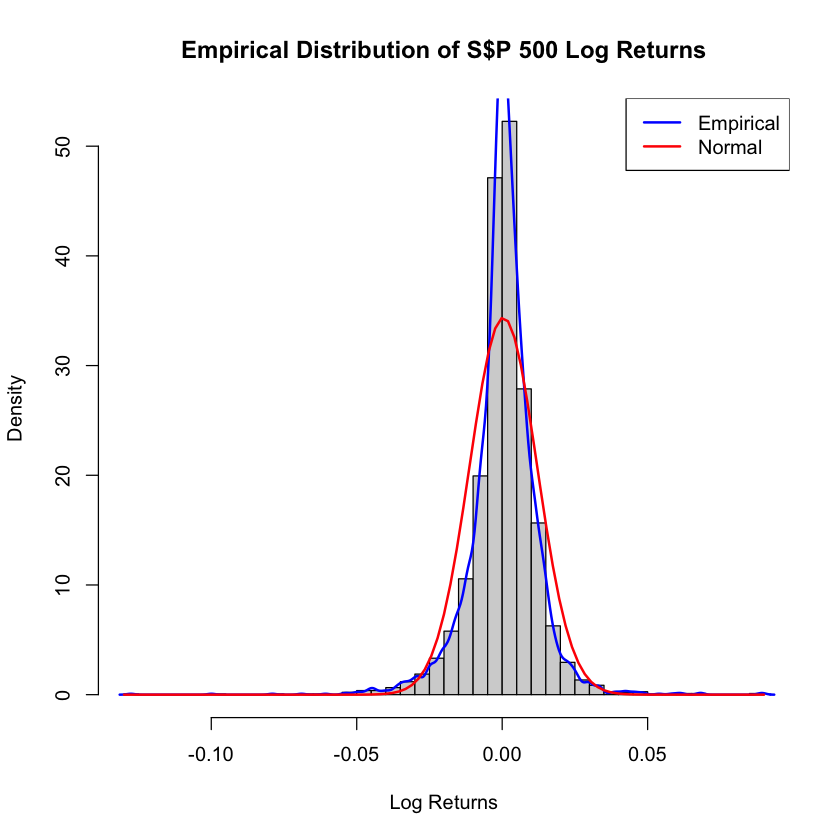

In [5]:
# Plot histogram with normal overlay
hist(log_returns, breaks = 50, probability = TRUE, main = "Empirical Distribution of S$P 500 Log Returns",
     xlab = "Log Returns")
lines(density(log_returns), col = "blue", lwd = 2) # Empirical density
curve(dnorm(x, mean = mean(log_returns), sd = sd(log_returns)), add = TRUE, col = "red", lwd = 2) # Normal density
legend("topright", legend = c("Empirical", "Normal"), col = c("blue", "red"), lty = 1, lwd = 2)

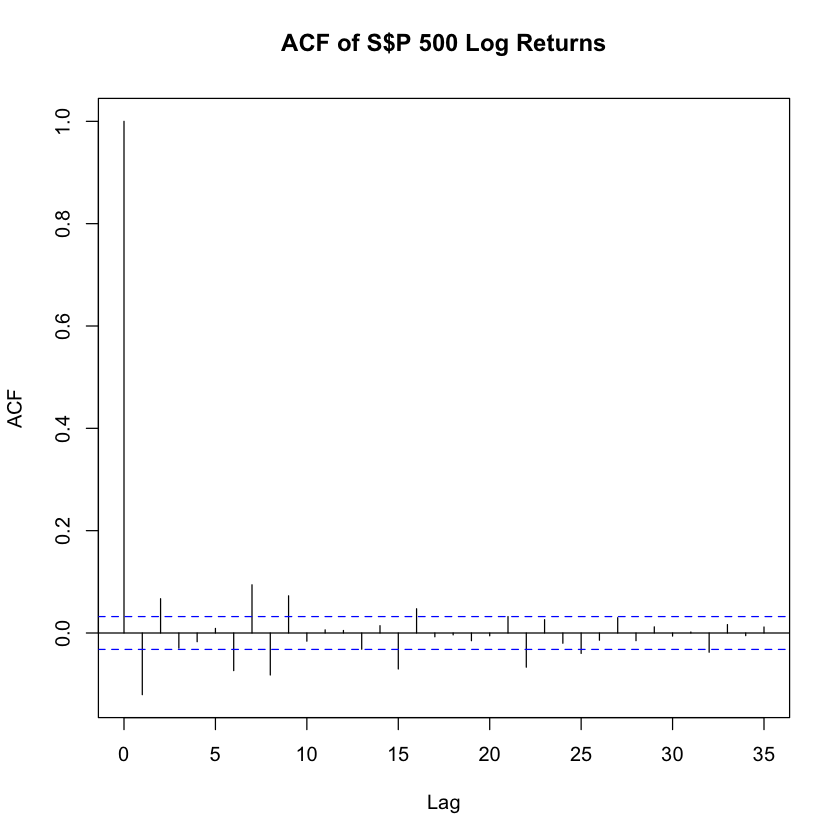

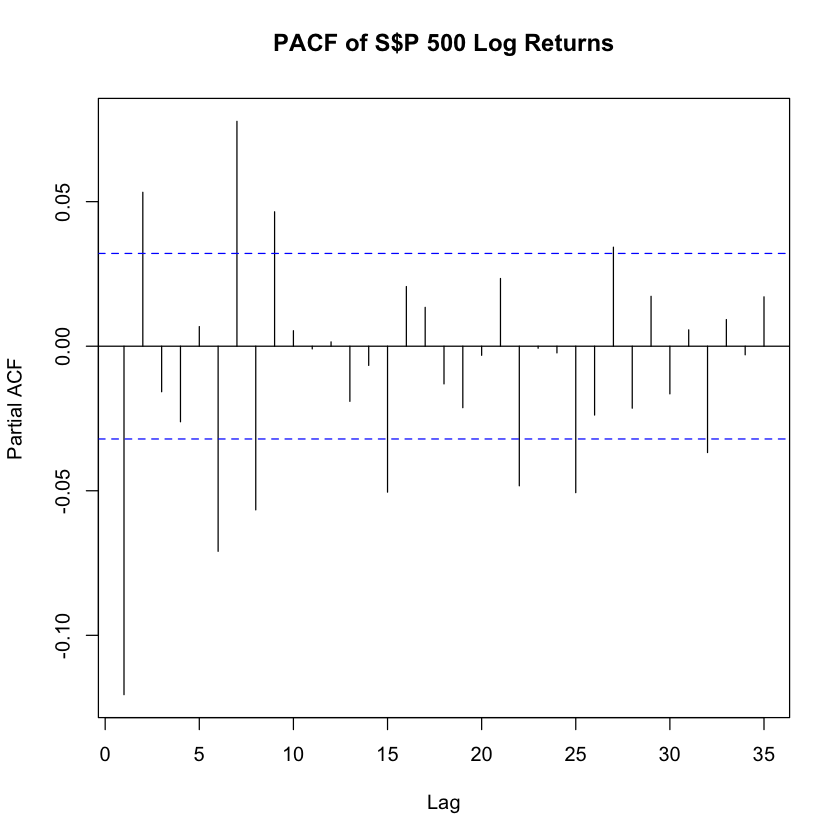

In [6]:
# ACF and PACF of log returns
acf(log_returns, main = "ACF of S$P 500 Log Returns")
pacf(log_returns, main = "PACF of S$P 500 Log Returns")

In [7]:
# Fit ARIMA model based on manual selection
fit_manual <- Arima(log_returns, order = c(1, 1, 1))  # Hypothetical order (modify based on ACF/PACF)

# Fit ARIMA model using automatic selection
fit_auto <- auto.arima(log_returns)

# Summary of models
summary(fit_manual)
summary(fit_auto)

Series: log_returns 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.1203  -1.000
s.e.   0.0163   0.001

sigma^2 = 0.0001328:  log likelihood = 11351.82
AIC=-22697.65   AICc=-22697.64   BIC=-22678.98

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 5.474161e-05 0.01152091 0.00765556 -Inf  Inf 0.6707499 0.006294548

Series: log_returns 
ARIMA(4,0,4) with non-zero mean 

Coefficients:
          ar1     ar2      ar3      ar4     ma1      ma2     ma3     ma4   mean
      -0.1380  0.8220  -0.2798  -0.8037  0.0458  -0.7707  0.3193  0.7027  4e-04
s.e.   0.0701  0.0681   0.0540   0.0589  0.0771   0.0710  0.0639  0.0666  2e-04

sigma^2 = 0.0001303:  log likelihood = 11398.32
AIC=-22776.64   AICc=-22776.58   BIC=-22714.39

Training set error measures:
                       ME      RMSE        MAE  MPE MAPE      MASE         ACF1
Training set 1.093536e-06 0.0114017 0.00767842 -Inf  Inf 0.6727528 -0.008998375


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 81.183, df = 8, p-value = 2.82e-14

Model df: 2.   Total lags used: 10



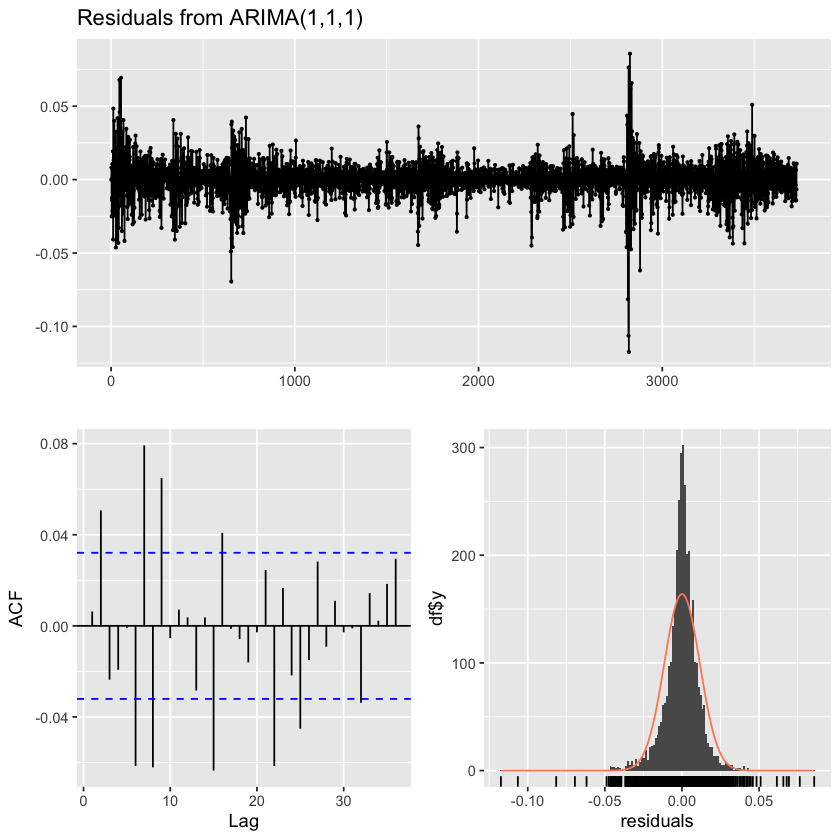


	Ljung-Box test

data:  Residuals from ARIMA(4,0,4) with non-zero mean
Q* = 8.6946, df = 3, p-value = 0.03364

Model df: 8.   Total lags used: 11



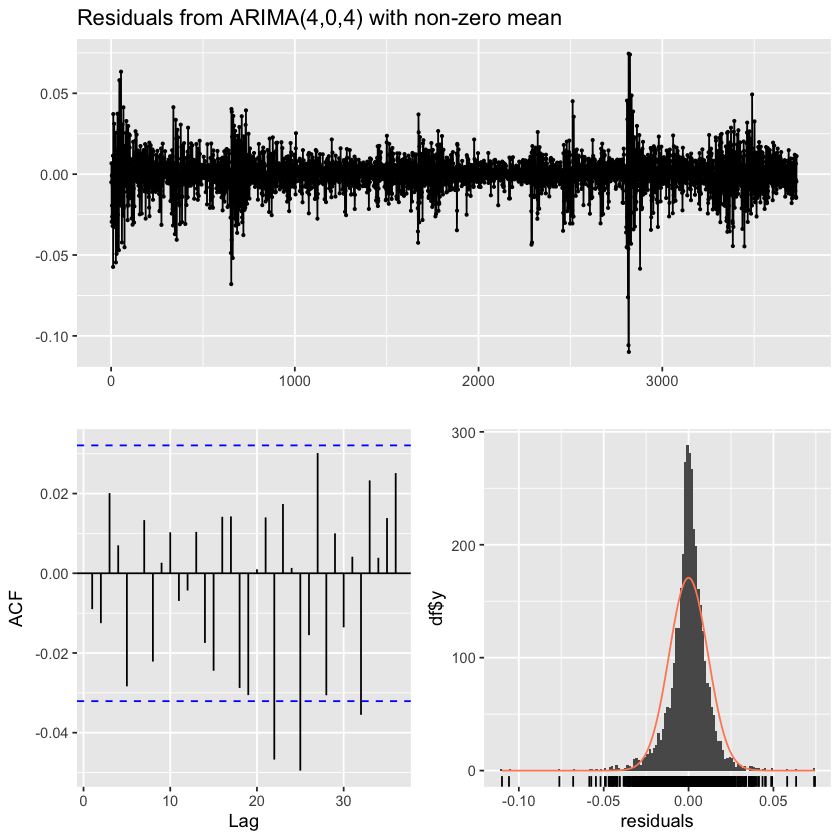

In [8]:
# Residual diagnostics for manual ARIMA
checkresiduals(fit_manual)

# Residual diagnostics for auto ARIMA
checkresiduals(fit_auto)

In [9]:
# Calculate Mean Squared Error (MSE)
mse_manual <- mean(residuals(fit_manual)^2)
mse_auto <- mean(residuals(fit_auto)^2)

# Display metrics
cat("Manual ARIMA Model - MSE:", mse_manual, "AIC:", fit_manual$aic, "\n")
cat("Auto ARIMA Model - MSE:", mse_auto, "AIC:", fit_auto$aic, "\n")

Manual ARIMA Model - MSE: 0.0001327313 AIC: -22697.65 
Auto ARIMA Model - MSE: 0.0001299988 AIC: -22776.64 


In [10]:
# Calculate metrics
aic_manual <- AIC(fit_manual)
aic_auto <- AIC(fit_auto)

bic_manual <- BIC(fit_manual)
bic_auto <- BIC(fit_auto)

rmse_manual <- sqrt(mean(residuals(fit_manual)^2))
rmse_auto <- sqrt(mean(residuals(fit_auto)^2))

# Calculate Mean Absolute Error (MAE)
mae_manual <- mean(abs(residuals(fit_manual)))
mae_auto <- mean(abs(residuals(fit_auto)))

# Display metrics
cat("Manual ARIMA Model - AIC:", aic_manual, "BIC:", bic_manual, "RMSE:", rmse_manual, "MAE:", mae_manual, "\n")
cat("Auto ARIMA Model - AIC:", aic_auto, "BIC:", bic_auto, "RMSE:", rmse_auto, "MAE:", mae_auto, "\n")

Manual ARIMA Model - AIC: -22697.65 BIC: -22678.98 RMSE: 0.01152091 MAE: 0.00765556 


Auto ARIMA Model - AIC: -22776.64 BIC: -22714.39 RMSE: 0.0114017 MAE: 0.00767842 


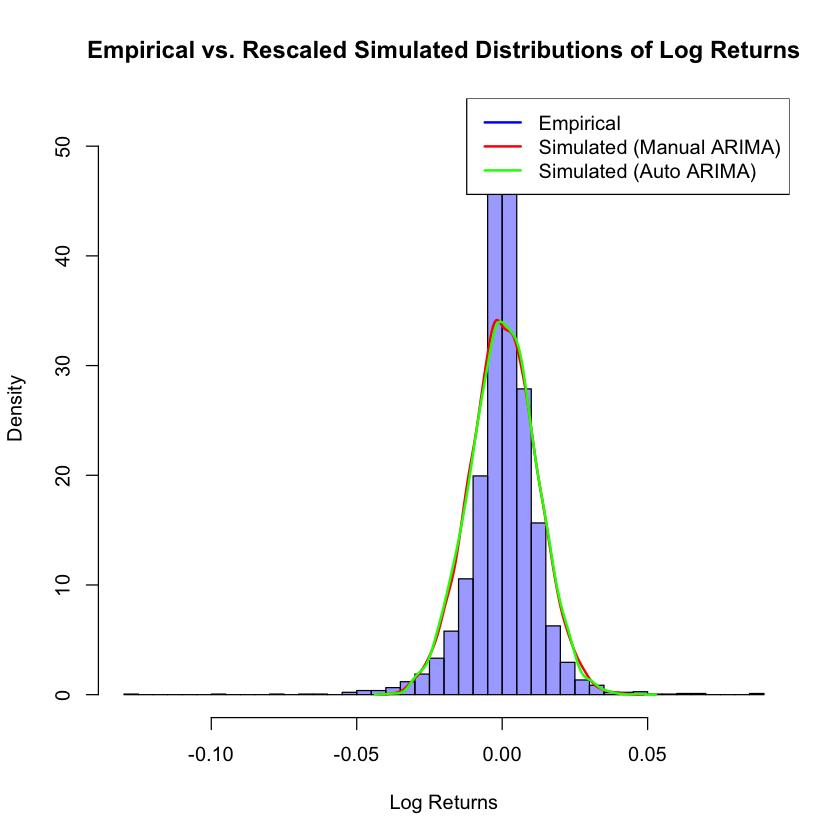

In [11]:
# Set the number of simulations to match the original series length
n <- length(log_returns)

# Simulate data based on the manually fitted ARIMA model parameters
set.seed(123)
sim_manual <- arima.sim(model = list(order = c(1, 1, 1),
                                     ar = fit_manual$coef[grep("ar", names(fit_manual$coef))],
                                     ma = fit_manual$coef[grep("ma", names(fit_manual$coef))]), n = n)

# Simulate data based on the auto-selected ARIMA model parameters
set.seed(123)
auto_order <- auto.arima(log_returns)$arma
sim_auto <- arima.sim(model = list(order = c(auto_order[1], auto_order[6], auto_order[2]),
                                   ar = fit_auto$coef[grep("ar", names(fit_auto$coef))],
                                   ma = fit_auto$coef[grep("ma", names(fit_auto$coef))]), n = n)

# Rescale the simulated series to match the empirical distribution of log_returns
sim_manual <- scale(sim_manual) * sd(log_returns) + mean(log_returns)
sim_auto <- scale(sim_auto) * sd(log_returns) + mean(log_returns)

# Plot empirical distribution with rescaled simulated distributions for comparison
hist(log_returns, breaks = 50, probability = TRUE, main = "Empirical vs. Rescaled Simulated Distributions of Log Returns",
     xlab = "Log Returns", col = rgb(0, 0, 1, 0.4))
lines(density(sim_manual), col = "red", lwd = 2)
lines(density(sim_auto), col = "green", lwd = 2)
legend("topright", legend = c("Empirical", "Simulated (Manual ARIMA)", "Simulated (Auto ARIMA)"),
       col = c("blue", "red", "green"), lty = 1, lwd = 2)